In [23]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# or
# from imports import (plt, np, xr)
path='/home/bd15084e-2d25b7-2d47db-2dade3-2daea695ce03d8/emiisop_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_201001-201412.nc' 
ds = xr.open_dataset(path)#, decode_times=False)

In [24]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 60)
Coordinates:
  * time       (time) object 2010-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    emiisop    (time, lat, lon) float32 ...
Attributes:
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    contact:                   Please send any requests or bug reports to nor...
    creation_date:             2019-08-15T13:40:00Z
    data_specs_version:        01.00.31
    experiment: 

In [25]:
ds1=ds['emiisop']

(array([8.10352e+05, 8.24900e+03, 4.91500e+03, 3.23800e+03, 1.47200e+03,
        6.88000e+02, 3.07000e+02, 1.69000e+02, 4.40000e+01, 6.00000e+00]),
 array([0.0000000e+00, 2.7511515e-10, 5.5023031e-10, 8.2534546e-10,
        1.1004606e-09, 1.3755758e-09, 1.6506909e-09, 1.9258062e-09,
        2.2009212e-09, 2.4760363e-09, 2.7511515e-09], dtype=float32),
 <a list of 10 Patch objects>)

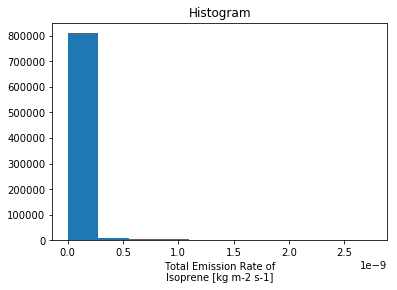

In [26]:
ds1.plot()

In [27]:
np.shape(ds.emiisop)

(60, 96, 144)

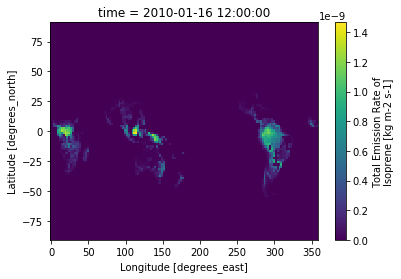

In [28]:
_ds = ds['emiisop'].isel(time=0)
_ds.plot()

In [29]:
import cartopy as cy
import cartopy.util as cutil

In [30]:
T_mm = ds['emiisop'].groupby('time.year').mean('time', keep_attrs=True)

In [31]:
T_mm

<xarray.DataArray 'emiisop' (year: 5, lat: 96, lon: 144)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 

In [32]:
average=T_mm.isel(year=0)#[2:, :,:]

In [33]:
average

<xarray.DataArray 'emiisop' (lat: 96, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    year     int64 2010
Attributes:
    standard_name:   tendency_of_atmosphere_mass_content_of_isoprene_due_to_e...
    long_name:       Total Emission Rate of Isoprene
    comment:         Integrate 3D emission field vertically to 2d field
    units:           kg m-2 s-1
    original_name:   SFisoprene
    original_units:  kg/m2/s
    history:         2019-08-15T13:39:53Z altered by CMOR: Converted units fr...
    cell_methods:    area: time: mean
    cell_measures:   area: areacella

In [34]:
import cartopy as cy

In [35]:
import cartopy.crs as ccrs
import cartopy as cy
def sp_map(*nrs, projection = ccrs.PlateCarree(), **kwargs):
    return plt.subplots(*nrs, subplot_kw={'projection':projection}, **kwargs)

def add_map_features(ax):
    ax.coastlines()
    gl = ax.gridlines()
    ax.add_feature(cy.feature.BORDERS);
    gl = ax.gridlines()#draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False

In [36]:
import matplotlib.path as mpath

def polarCentral_set_latlim(lat_lims, ax):
    ax.set_extent([-180, 180, lat_lims[0], lat_lims[1]], ccrs.PlateCarree())
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)

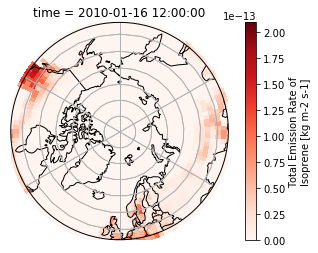

In [37]:
fig, ax = sp_map(1, projection=ccrs.NorthPolarStereo() )
lat_lims = [50,90]
ds['emiisop'].isel(time=0).where(ds['lat']>lat_lims[0]).plot(ax=ax, cmap=plt.get_cmap('Reds'),transform=ccrs.PlateCarree())
polarCentral_set_latlim(lat_lims, ax)
add_map_features(ax)
plt.show()


In [38]:
T_mm = ds['emiisop'].groupby('time.year').mean('time')

In [39]:
T_mm

<xarray.DataArray 'emiisop' (year: 5, lat: 96, lon: 144)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 

In [40]:
average=T_mm[2:, :,:]

In [41]:
average

<xarray.DataArray 'emiisop' (year: 3, lat: 96, lon: 144)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year  

In [42]:
#fig, ax= plt.subplots(1, projection=)

In [43]:
ds['emiisop'].attrs

{'standard_name': 'tendency_of_atmosphere_mass_content_of_isoprene_due_to_emission',
 'long_name': 'Total Emission Rate of Isoprene',
 'comment': 'Integrate 3D emission field vertically to 2d field',
 'units': 'kg m-2 s-1',
 'original_name': 'SFisoprene',
 'original_units': 'kg/m2/s',
 'history': "2019-08-15T13:39:53Z altered by CMOR: Converted units from 'kg/m2/s' to 'kg m-2 s-1'. 2019-08-15T13:40:00Z altered by CMOR: Converted type from 'd' to 'f'.",
 'cell_methods': 'area: time: mean',
 'cell_measures': 'area: areacella'}

In [44]:
average.attrs

{}

ValueError: DataArray must be 2d

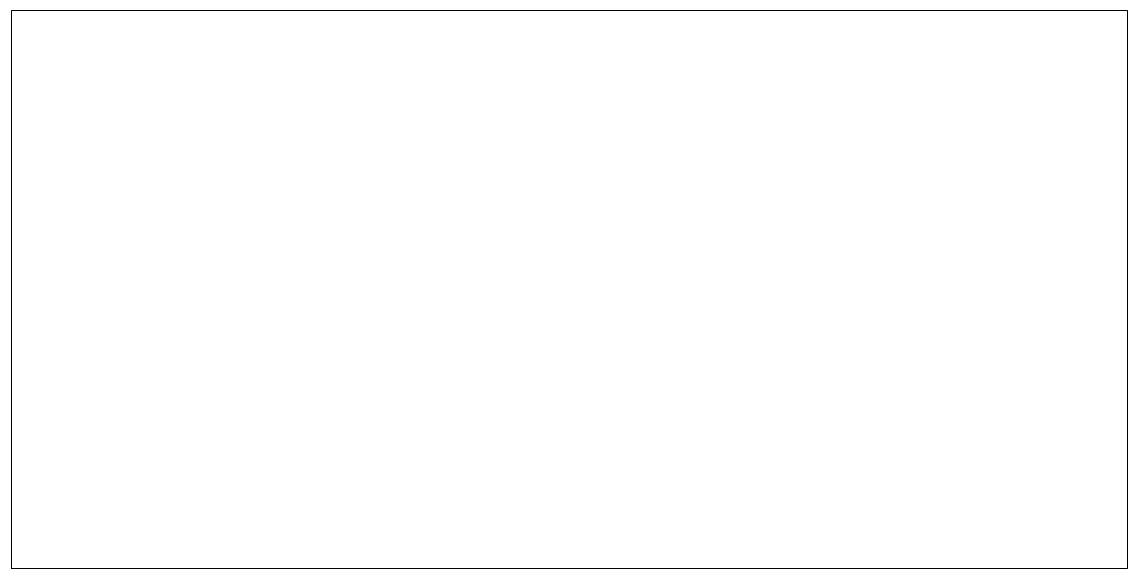

In [45]:
#params={'axes.labelsize':18, 'axes.titlesize':18, 'legend.fontsize':18}
#matplotlib.rcParams.update(params)
f,ax = plt.subplots(figsize=(20,15),subplot_kw={'projection' : cy.crs.PlateCarree()}) #def
average.attrs['units']='kg/m$^2$/s'
average.attrs['long_name']='Emission Isop'
tas_c,lon_c=cutil.add_cyclic_point(average.data, coord=average['lon'].data)

average.plot.contourf(ax=ax, transform = cy.crs.PlateCarree(), robust=True,  cmap='magma')

#im=ax.pcolor(average.lon,average.lat, average.year[-1], cmap='magma',transform=cy.crs.PlateCarree())



ax.set_title('Mean temp')
ax.coastlines()

#cbar=plt.colorbar(im,ax=ax,orientation='horizontal')
#cbar.set_label('Kelvin')
#gl = ax.gridlines(draw_labels=True)
#gl.xlabels_top   = False
#gl.ylabels_right = False
#ax.add_feature(cy.feature.BORDERS);

In [ ]:
average

In [ ]:
path='/home/bd15084e-2d25b7-2d47db-2dade3-2daea695ce03d8/emiisop_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_185001-185912.nc' 
noresm = xr.open_dataset(path)#, decode_times=False)

path='/home/bd15084e-2d25b7-2d47db-2dade3-2daea695ce03d8/isop_AERmon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-189912.nc' 
ukesm = xr.open_dataset(path)#, decode_times=False)

In [ ]:
noresm

In [ ]:
ukesm

In [ ]:
_noresm = noresm['emiisop'].isel(time=0)
_noresm.plot()

In [ ]:
_ukesm = ukesm['isop'].isel(time=0,lev=1)
_ukesm.plot()

In [ ]:
emiisop = 'emiisop'
_nmt = noresm[emiisop].mean(['lat','lon']) # collapses over time

In [ ]:
_nmt.plot()

In [ ]:
ukesm

In [ ]:
isop = 'isop'
_nmt1 = ukesm[isop].mean(['lat','lon','lev']) # collapses over time

In [ ]:
_nmt1.plot()